<a href="https://colab.research.google.com/github/SaimaCU/Financial-Risk-Classification/blob/main/Financial_Risk_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Model (Max Voting)

In [25]:
import pandas as pd

# loading dataset
file_path = '/content/drive/MyDrive/Data/financial_risk_assessment.csv'
df = pd.read_csv(file_path)

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

(None,
    Age      Gender Education Level Marital Status   Income  Credit Score  \
 0   49        Male             PhD       Divorced  72799.0         688.0   
 1   57      Female      Bachelor's        Widowed      NaN         690.0   
 2   21  Non-binary        Master's         Single  55687.0         600.0   
 3   59        Male      Bachelor's         Single  26508.0         622.0   
 4   25  Non-binary      Bachelor's        Widowed  49427.0         766.0   
 
    Loan Amount Loan Purpose Employment Status  Years at Current Job  \
 0      45713.0     Business        Unemployed                    19   
 1      33835.0         Auto          Employed                     6   
 2      36623.0         Home          Employed                     8   
 3      26541.0     Personal        Unemployed                     2   
 4      36528.0     Personal        Unemployed                    10   
 
   Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
 0            P

In [26]:
from sklearn.impute import SimpleImputer

# features and target
X = df.drop('Risk Rating', axis=1)
y = df['Risk Rating']

# numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# replace missing values with median
num_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

# replace missing values for categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])


X.isnull().sum()


,0
Age,0
Gender,0
Education Level,0
Marital Status,0
Income,0
Credit Score,0
Loan Amount,0
Loan Purpose,0
Employment Status,0
Years at Current Job,0


              precision    recall  f1-score   support

        High       0.00      0.00      0.00       326
         Low       0.59      1.00      0.74      1779
      Medium       0.33      0.00      0.01       895

    accuracy                           0.59      3000
   macro avg       0.31      0.33      0.25      3000
weighted avg       0.45      0.59      0.44      3000

Recall Score: 0.5916666666666667
Precision Score: 0.5916666666666667
F1 Score: 0.5916666666666667
Accuracy: 0.5916666666666667


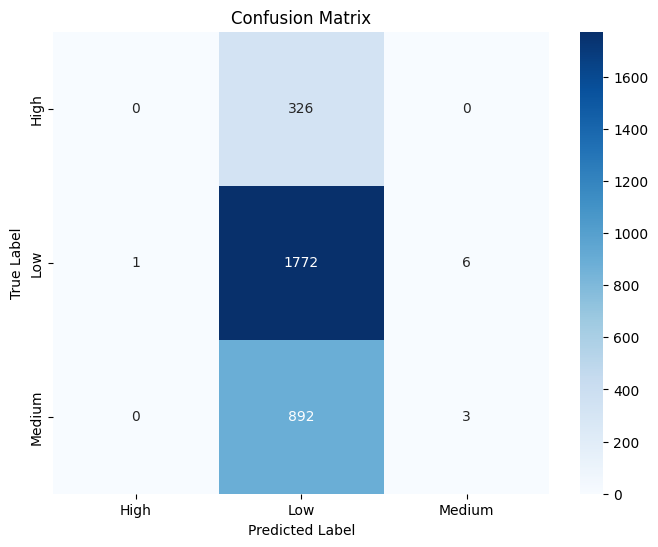

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier

# encoding features and target
X_encoded = pd.get_dummies(X, drop_first=True)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# individual models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# max voting
voting_clf = VotingClassifier(estimators=[('lr', logreg), ('rf', rf), ('gb', gb)], voting='hard')

# training
voting_clf.fit(X_train_scaled, y_train)

# predictions and evaluate
y_pred = voting_clf.predict(X_test_scaled)
report = classification_report(y_test, y_pred, target_names=le.classes_)


print(report)


recall = recall_score(y_test, y_pred, average = 'micro')
precision = precision_score(y_test, y_pred, average = 'micro')
f1 = f1_score(y_test, y_pred, average = 'micro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Recall Score: {recall}")
print(f"Precision Score: {precision}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Semi-supervised (FixMatch)

In [13]:
import pandas as pd

# loading dataset
file_path = '/content/drive/MyDrive/Data/financial_risk_assessment.csv'
data = pd.read_csv(file_path)


data.head(), data.info(), data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

(   Age      Gender Education Level Marital Status   Income  Credit Score  \
 0   49        Male             PhD       Divorced  72799.0         688.0   
 1   57      Female      Bachelor's        Widowed      NaN         690.0   
 2   21  Non-binary        Master's         Single  55687.0         600.0   
 3   59        Male      Bachelor's         Single  26508.0         622.0   
 4   25  Non-binary      Bachelor's        Widowed  49427.0         766.0   
 
    Loan Amount Loan Purpose Employment Status  Years at Current Job  \
 0      45713.0     Business        Unemployed                    19   
 1      33835.0         Auto          Employed                     6   
 2      36623.0         Home          Employed                     8   
 3      26541.0     Personal        Unemployed                     2   
 4      36528.0     Personal        Unemployed                    10   
 
   Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
 0            Poor    

In [14]:
# replace missing values with the mean
continuous_columns = ['Income', 'Credit Score', 'Loan Amount', 'Assets Value',
                      'Number of Dependents', 'Previous Defaults']
for col in continuous_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# verifying if all missing values are handled
data.isnull().sum()


<ipython-input-14-0b44fe111449>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


,0
Age,0
Gender,0
Education Level,0
Marital Status,0
Income,0
Credit Score,0
Loan Amount,0
Loan Purpose,0
Employment Status,0
Years at Current Job,0


In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# encoding using LabelEncoder
categorical_columns = ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose',
                       'Employment Status', 'Payment History', 'City', 'State', 'Country', 'Risk Rating']

label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])


scaler = StandardScaler()
continuous_columns = ['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job',
                      'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents',
                      'Previous Defaults', 'Marital Status Change']

data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

# features and target
X = data.drop('Risk Rating', axis=1)
y = data['Risk Rating']

# transformed data
X.head(), y.head()


(        Age  Gender  Education Level  Marital Status    Income  Credit Score  \
 0  0.372049       1                3               0  0.106582     -0.210556   
 1  0.908593       0                0               3  0.000000     -0.172649   
 2 -1.505856       2                2               2 -0.529872     -1.878458   
 3  1.042729       1                0               2 -1.615139     -1.461482   
 4 -1.237584       2                0               3 -0.762703      1.267812   
 
    Loan Amount  Loan Purpose  Employment Status  Years at Current Job  \
 0     1.529719             1                  2              1.650699   
 1     0.534811             0                  0             -0.602523   
 2     0.768335             2                  0             -0.255874   
 3    -0.076139             3                  2             -1.295822   
 4     0.760378             3                  2              0.090776   
 
    Payment History  Debt-to-Income Ratio  Assets Value  Number of

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np


# 10% of the data as labeled and the rest as unlabeled for semi-supervised learning.
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.9, random_state=0, stratify=y)

# training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=0, stratify=y_labeled)

# summary
(X_train.shape, X_val.shape, X_unlabeled.shape), (len(y_train), len(y_val), len(y_unlabeled))


(((1200, 19), (300, 19), (13500, 19)), (1200, 300, 13500))

In [17]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# converting data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_unlabeled_tensor = torch.tensor(X_unlabeled.values, dtype=torch.float32)

# data loaders
batch_size = 64
labeled_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=batch_size)
unlabeled_loader = DataLoader(TensorDataset(X_unlabeled_tensor, torch.zeros(X_unlabeled_tensor.size(0), dtype=torch.long)), batch_size=batch_size, shuffle=True)


In [18]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# the model
input_size = X_train.shape[1]
num_classes = len(np.unique(y))
model = SimpleNN(input_size, num_classes)


In [19]:
import torch.optim as optim

def train_fixmatch(model, labeled_loader, unlabeled_loader, val_loader, epochs=10, lambda_u=1.0):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    model.train()

    for epoch in range(epochs):
        total_loss = 0

        for (x_l, y_l), (x_ul, _) in zip(labeled_loader, unlabeled_loader):
            x_l, y_l = x_l.to(device), y_l.to(device)
            x_ul = x_ul.to(device)


            outputs_labeled = model(x_l)
            loss_supervised = criterion(outputs_labeled, y_l)

            # pseudo-labels for the unlabeled data
            with torch.no_grad():
                outputs_unlabeled = model(x_ul)
                pseudo_labels = torch.argmax(outputs_unlabeled, dim=1)

            # consistency loss
            outputs_unlabeled = model(x_ul)
            loss_unsupervised = criterion(outputs_unlabeled, pseudo_labels)

            # total loss combines
            loss = loss_supervised + lambda_u * loss_unsupervised
            total_loss += loss.item()

            # backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(labeled_loader)}")

        # validation
        validate(model, val_loader)


In [20]:
def validate(model, val_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val, y_val = x_val.to(device), y_val.to(device)
            outputs = model(x_val)
            _, predicted = torch.max(outputs, 1)
            total += y_val.size(0)
            correct += (predicted == y_val).sum().item()
    accuracy = 100 * correct / total
    print(f'Validation Accuracy: {accuracy:.2f}%')
    model.train()


In [21]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# training
train_fixmatch(model, labeled_loader, unlabeled_loader, val_loader, epochs=20, lambda_u=1.0)


Epoch 1/20, Loss: 40.99337279169183
Validation Accuracy: 60.00%
Epoch 2/20, Loss: 9.172875755711607
Validation Accuracy: 10.00%
Epoch 3/20, Loss: 12.146850887097811
Validation Accuracy: 60.00%
Epoch 4/20, Loss: 15.927376797324733
Validation Accuracy: 60.00%
Epoch 5/20, Loss: 6.838610159723382
Validation Accuracy: 29.33%
Epoch 6/20, Loss: 7.748685058794524
Validation Accuracy: 60.00%
Epoch 7/20, Loss: 10.770356981377853
Validation Accuracy: 60.00%
Epoch 8/20, Loss: 7.8711799822355575
Validation Accuracy: 11.67%
Epoch 9/20, Loss: 5.381718008141768
Validation Accuracy: 60.00%
Epoch 10/20, Loss: 6.1072554713801335
Validation Accuracy: 60.67%
Epoch 11/20, Loss: 5.404139550108659
Validation Accuracy: 60.00%
Epoch 12/20, Loss: 7.526806078459087
Validation Accuracy: 60.00%
Epoch 13/20, Loss: 10.591399042229904
Validation Accuracy: 60.00%
Epoch 14/20, Loss: 5.085757343392623
Validation Accuracy: 24.00%
Epoch 15/20, Loss: 5.1644298026436255
Validation Accuracy: 30.33%
Epoch 16/20, Loss: 3.650337

In [22]:
import numpy as np

def get_predictions(model, val_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            outputs = model(x_val)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_val.numpy())
    return np.array(all_preds), np.array(all_labels)

# predictions and true labels
y_val_pred, y_val_true = get_predictions(model, val_loader)


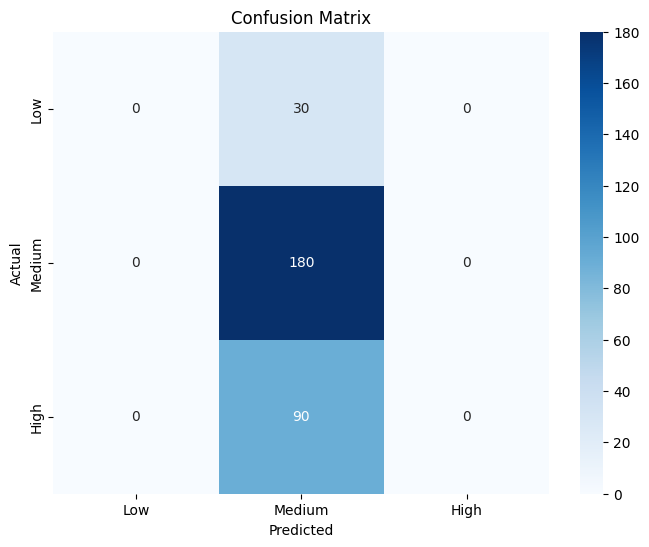

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(y_val_true, y_val_pred)

class_names = ['Low', 'Medium', 'High']

# confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_val_true, y_val_pred, target_names=class_names))


              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        30
      Medium       0.60      1.00      0.75       180
        High       0.00      0.00      0.00        90

    accuracy                           0.60       300
   macro avg       0.20      0.33      0.25       300
weighted avg       0.36      0.60      0.45       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
